In [1]:
## Okay so the other notebook was getting way too disorganized for comfort so here's a new one with...
## ... the plots that I fooled around with/successfully produced for phytoplankton binned with temperature...
## With volume weighted mean included 

In [2]:
import xarray as xr
import numpy as np 
from matplotlib import pyplot as plt

In [3]:
rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'
datadir_temperature = 'ocean_monthly_z/ts/monthly/5yr/'
filename_temperature = 'ocean_monthly_z.071101-071512.thetao.nc'



datadir_phytoplankton = 'ocean_cobalt_omip_tracers_month_z/ts/monthly/5yr/'
filename_phytoplankton = 'ocean_cobalt_omip_tracers_month_z.071101-071512.phyc.nc'


temperature = xr.open_dataset(rootdir+datadir_temperature+filename_temperature)
phytoplankton = xr.open_dataset(rootdir+datadir_phytoplankton+filename_phytoplankton)

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)


In [4]:
ds = xr.merge([temperature, phytoplankton])

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


In [5]:
filename_volume = 'ocean_cobalt_omip_tracers_month_z.071101-071512.volcello.nc'
volume = xr.open_dataset(rootdir+datadir_phytoplankton+filename_volume)

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)


In [6]:
df = xr.merge([ds, volume])

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


In [7]:
pV = df.volcello*df.phyc
pV.name = 'pV'
df = xr.merge([df,pV])

In [8]:
df = df.set_coords('thetao')
theta_bins = np.arange(-2,30,2) 
pV_in_theta = df.pV.isel(time=5,z_l=0).groupby_bins('thetao',theta_bins)
V_in_theta = df.volcello.isel(time=5,z_l=0).groupby_bins('thetao',theta_bins)

In [9]:
p_vmean = pV_in_theta.sum(xr.ALL_DIMS)/V_in_theta.sum(xr.ALL_DIMS)

Text(0, 0.5, 'Concentration (mol m^-3)')

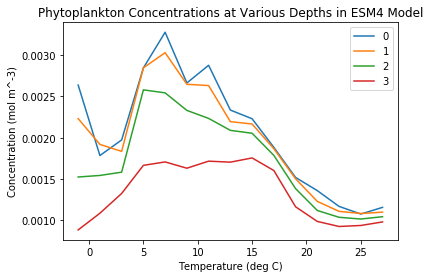

In [10]:
## June phytoplankton concentrations at depths 0-3 in the ESM4 model
## I'm only using this as a comparison for the next two graphs that will be in the same month and at the same depth...
#.. but in different hemispheres 

for z in (0,1,2,3):

    pV_in_theta = df.pV.isel(time=5,z_l=z).groupby_bins('thetao',theta_bins)
    V_in_theta = df.volcello.isel(time=5,z_l=z).groupby_bins('thetao',theta_bins)

    p_vmean = pV_in_theta.sum(xr.ALL_DIMS)/V_in_theta.sum(xr.ALL_DIMS)

    p_vmean.plot(label= '%s' % z)

plt.title('Phytoplankton Concentrations at Various Depths in ESM4 Model')
plt.legend()
plt.xlabel('Temperature (deg C)')
plt.ylabel('Concentration (mol m^-3)')

In [14]:
df

<xarray.Dataset>
Dimensions:     (nv: 2, time: 60, xh: 720, yh: 576, z_i: 36, z_l: 35)
Coordinates:
  * nv          (nv) float64 1.0 2.0
    thetao      (time, z_l, yh, xh) float32 ...
  * time        (time) object 0711-01-16 12:00:00 ... 0715-12-16 12:00:00
  * xh          (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh          (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_i         (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l         (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Data variables:
    average_DT  (time) timedelta64[ns] 31 days 28 days ... 30 days 31 days
    average_T1  (time) object 0710-07-08 00:00:00 ... 0715-06-06 00:00:00
    average_T2  (time) object 0710-08-08 00:00:00 ... 0715-07-07 00:00:00
    time_bnds   (time, nv) object 0711-01-01 00:00:00 ... 0716-01-01 00:00:00
    phyc        (time, z_l, yh, xh) float32 ...
    volcello    (time, z_l, yh, xh) float32 ...
    pV    

Text(0, 0.5, 'Concentration (mol m^-3)')

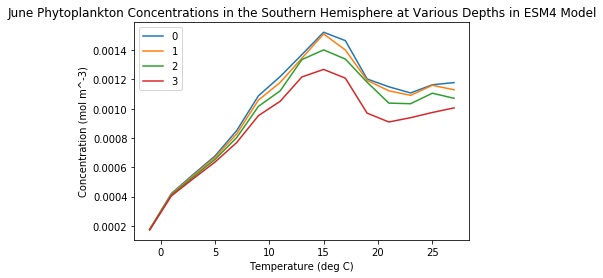

In [14]:
## Data for the southern hemisphere

for z in (0,1,2,3):

    pV_in_theta = df.pV.isel(time=5,z_l=z,yh=range(0,288)).groupby_bins('thetao',theta_bins)
    V_in_theta = df.volcello.isel(time=5,z_l=z,yh=range(0,288)).groupby_bins('thetao',theta_bins)

    p_vmean = pV_in_theta.sum(xr.ALL_DIMS)/V_in_theta.sum(xr.ALL_DIMS)

    p_vmean.plot(label= '%s' % z)

plt.title('June Phytoplankton Concentrations in the Southern Hemisphere at Various Depths in ESM4 Model')
plt.legend()
plt.xlabel('Temperature (deg C)')
plt.ylabel('Concentration (mol m^-3)')

Text(0, 0.5, 'Concentration (mol m^-3)')

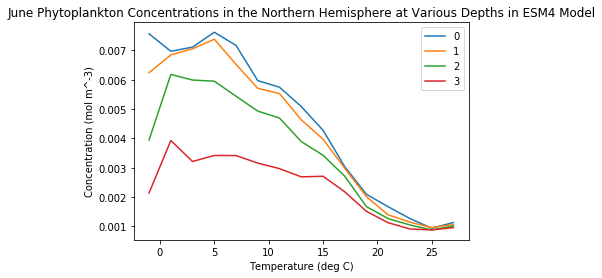

In [15]:
## Data for the northern hemisphere 

for z in (0,1,2,3):

    pV_in_theta = df.pV.isel(time=5,z_l=z,yh=range(288,576)).groupby_bins('thetao',theta_bins)
    V_in_theta = df.volcello.isel(time=5,z_l=z,yh=range(288,576)).groupby_bins('thetao',theta_bins)

    p_vmean = pV_in_theta.sum(xr.ALL_DIMS)/V_in_theta.sum(xr.ALL_DIMS)

    p_vmean.plot(label= '%s' % z)

plt.title('June Phytoplankton Concentrations in the Northern Hemisphere at Various Depths in ESM4 Model')
plt.legend()
plt.xlabel('Temperature (deg C)')
plt.ylabel('Concentration (mol m^-3)')

Text(0, 0.5, 'Concentration (mol m^-3)')

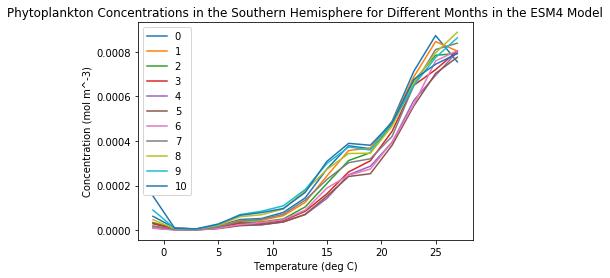

In [18]:
## Now let's see how the graph looks when we go based off of various months and not depths 
## Let's do the southern hemisphere first



for t in range(0,11,1):

    pV_in_theta = df.pV.isel(time=t,yh=range(0,288)).groupby_bins('thetao',theta_bins)
    V_in_theta = df.volcello.isel(time=t,yh=range(0,288)).groupby_bins('thetao',theta_bins)

    p_vmean = pV_in_theta.sum(xr.ALL_DIMS)/V_in_theta.sum(xr.ALL_DIMS)

    p_vmean.plot(label= '%s' % t)

plt.title('Phytoplankton Concentrations in the Southern Hemisphere for Different Months in the ESM4 Model')
plt.legend()
plt.xlabel('Temperature (deg C)')
plt.ylabel('Concentration (mol m^-3)')

In [22]:
## And here's the northern hemisphere over the course of a year over all depths 

for t in range(0,11,1):

    pV_in_theta = df.pV.isel(time=t,yh=range(288,576)).groupby_bins('thetao',theta_bins)
    V_in_theta = df.volcello.isel(time=t,yh=range(288,576)).groupby_bins('thetao',theta_bins)

    p_vmean = pV_in_theta.sum(xr.ALL_DIMS)/V_in_theta.sum(xr.ALL_DIMS)

    p_vmean.plot(label= '%s' % t)

plt.title('Phytoplankton Concentrations in the Northern Hemisphere for Different Months in the ESM4 Model')
plt.legend()
plt.xlabel('Temperature (deg C)')
plt.ylabel('Concentration (mol m^-3)')

ValueError: unsupported format character 'M' (0x4d) at index 1

Text(0, 0.5, 'Concentration (mol m^-3)')

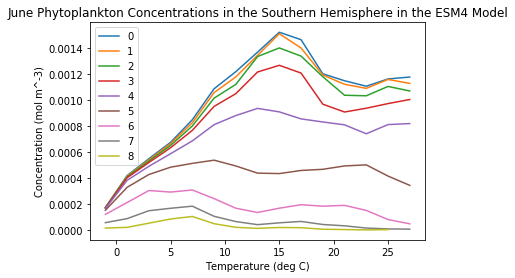

In [21]:
## Okay so all of the months are looking the same at all of the depths. 
## I don't think we'll need to plot ALL of the depths, to be honest; just some of them 
## Going based off of the results from my multiple phytoplankton maps in the file titled "phytoplankton-maps", I think graphing data with..
## ..only one month (June) and up to 7 depths might make a difference


##### Let's try this method with the southern hemisphere 

for z in range(0,9,1):

    pV_in_theta = df.pV.isel(time=5,z_l=z,yh=range(0,288)).groupby_bins('thetao',theta_bins)
    V_in_theta = df.volcello.isel(time=5,z_l=z,yh=range(0,288)).groupby_bins('thetao',theta_bins)

    p_vmean = pV_in_theta.sum(xr.ALL_DIMS)/V_in_theta.sum(xr.ALL_DIMS)

    p_vmean.plot(label= '%s' % z)

plt.title('June Phytoplankton Concentrations in the Southern Hemisphere in the ESM4 Model')
plt.legend()
plt.xlabel('Temperature (deg C)')
plt.ylabel('Concentration (mol m^-3)')

In [23]:
## Alrighty so it seems as though after 7 depth levels the phytoplankton concentration becomes similar/there aren't many differences that the model picks up. 

Text(0, 0.5, 'Concentration (mol m^-3)')

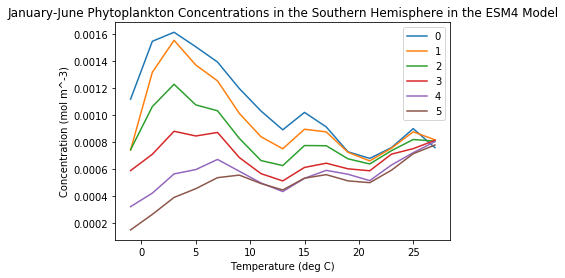

In [24]:
## This is a plot for phytoplankton concentrations between January and June at depth levels 0-7 in the southern hemisphere
for t in (0,1,2,3,4,5):

        pV_in_theta = df.pV.isel(time=t,z_l=range(0,8,1),yh=range(0,288)).groupby_bins('thetao',theta_bins)
        V_in_theta = df.volcello.isel(time=t,z_l=range(0,8,1),yh=range(0,288)).groupby_bins('thetao',theta_bins)

        p_vmean = pV_in_theta.sum(xr.ALL_DIMS)/V_in_theta.sum(xr.ALL_DIMS)

        p_vmean.plot(label= '%s' % t)

plt.title('January-June Phytoplankton Concentrations in the Southern Hemisphere in the ESM4 Model')
plt.legend()
plt.xlabel('Temperature (deg C)')
plt.ylabel('Concentration (mol m^-3)')

In [ ]:
## This is a plot for phytoplankton concentrations between January and June at depth levels 0-7 in the northern hemisphere
for t in (0,1,2,3,4,5):

        pV_in_theta = df.pV.isel(time=t,z_l=range(0,8,1),yh=range(288,576)).groupby_bins('thetao',theta_bins)
        V_in_theta = df.volcello.isel(time=t,z_l=range(0,8,1),yh=range(288,576)).groupby_bins('thetao',theta_bins)

        p_vmean = pV_in_theta.sum(xr.ALL_DIMS)/V_in_theta.sum(xr.ALL_DIMS)

        p_vmean.plot(label= '%s' % t)

plt.title('January-June Phytoplankton Concentrations in the Northern Hemisphere in the ESM4 Model')
plt.legend()
plt.xlabel('Temperature (deg C)')
plt.ylabel('Concentration (mol m^-3)')

In [ ]:
## Ooooh interesting! Now let's look at July-December in the southern hemisphere at depth levels 0-7

for t in range(6,12,1):

        pV_in_theta = df.pV.isel(time=t,z_l=range(0,8,1),yh=range(0,288)).groupby_bins('thetao',theta_bins)
        V_in_theta = df.volcello.isel(time=t,z_l=range(0,8,1),yh=range(0,288)).groupby_bins('thetao',theta_bins)

        p_vmean = pV_in_theta.sum(xr.ALL_DIMS)/V_in_theta.sum(xr.ALL_DIMS)

        p_vmean.plot(label= '%s' % t)

plt.title('July-December Phytoplankton Concentrations in the Southern Hemisphere in the ESM4 Model')
plt.legend()
plt.xlabel('Temperature (deg C)')
plt.ylabel('Concentration (mol m^-3)')

In [ ]:
## And in the northern hemisphere...

for t in range(6,12,1):

        pV_in_theta = df.pV.isel(time=t,z_l=range(0,8,1),yh=range(288,576)).groupby_bins('thetao',theta_bins)
        V_in_theta = df.volcello.isel(time=t,z_l=range(0,8,1),yh=range(288,576)).groupby_bins('thetao',theta_bins)

        p_vmean = pV_in_theta.sum(xr.ALL_DIMS)/V_in_theta.sum(xr.ALL_DIMS)

        p_vmean.plot(label= '%s' % t)

plt.title('July-December Phytoplankton Concentrations in the Northern Hemisphere in the ESM4 Model')
plt.legend()
plt.xlabel('Temperature (deg C)')
plt.ylabel('Concentration (mol m^-3)')

Text(0, 0.5, 'Concentration (mol m^-3)')

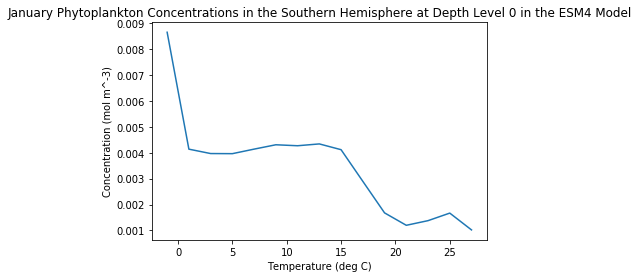

In [30]:
## I'm using this graph to compare phytoplankton concentration with the graph that Tyrone produced 
## I'll compare this with content just to see which one is a better indicator of phytoplankton change across temperatures


pV_in_theta = df.pV.isel(time=0,z_l=0,yh=range(0,288)).groupby_bins('thetao',theta_bins)
V_in_theta = df.volcello.isel(time=0,z_l=0,yh=range(0,288)).groupby_bins('thetao',theta_bins)

p_vmean = pV_in_theta.sum(xr.ALL_DIMS)/V_in_theta.sum(xr.ALL_DIMS)

p_vmean.plot()
plt.title('January Phytoplankton Concentrations in the Southern Hemisphere at Depth Level 0 in the ESM4 Model')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Concentration (mol m^-3)')

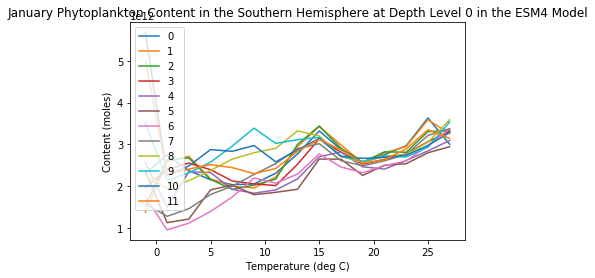

In [71]:
## Phytoplankton content. Again, I'm using this in conjunction with Tyrone's maps to see if content or concentration is a...
## ..more accurate way to measure differences in phytoplankton in temperature coordinates 
for t in range(12):
    pV_in_theta = df.pV.isel(time=t,yh=range(0,576)).groupby_bins('thetao',theta_bins)
    #V_in_theta = df.volcello.isel(time=0,z_l=0,yh=range(0,576)).groupby_bins('thetao',theta_bins)

    p_vmean = pV_in_theta.sum(xr.ALL_DIMS)

    p_vmean.plot(label = '%s' % t)
    
plt.title('January Phytoplankton Content in the Southern Hemisphere at Depth Level 0 in the ESM4 Model')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Content (moles)')
plt.legend()

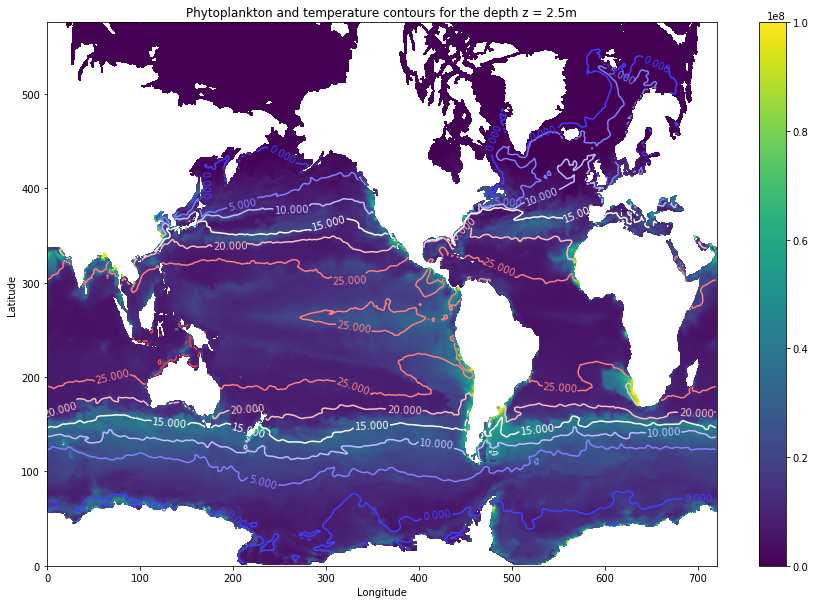

In [68]:
import matplotlib.cm as cm
plt.figure(figsize = (15,10)) #Changes the size of the figure, larger map makes it easier to see data
im = plt.pcolormesh(df.pV.isel(time = 0)) # colors map using phytoplankton data
im.set_clim([0, 1e8])
# im = plt.contourf(phyto.phyc.isel(time = 0, z_l = 0)) # Uses filled contour lines as maps, looks smooth. 
# You choose pcolormesh or contourf
a = plt.contour(temperature.thetao.isel(time = 0, z_l = ), cmap = plt.cm.bwr) # makes contours lines, sets the color as scales of red to white to blue.
plt.clabel(a, inline = 1, fontsize = 10)
plt.colorbar(im)
plt.title('Phytoplankton and temperature contours for the depth z = 2.5m')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()